In this kernel we perform segmentation of finance service customers.finance service have lot of customer who not able to pay the credited amount on time.by using this we are try to deside strategy to recover credited ampunt.

importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading the Raw data

In [2]:
data=pd.read_csv(r'C:\Users\RUSHI\Desktop\b daily practice\project\finance customer segmentation\german_credit_data.csv')

view of raw Data

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


checking for missing values

In [4]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

column Saving accounts and Checking account have missing values

In [5]:
data.shape

(1000, 10)

In [6]:
data['Saving accounts'].describe()

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

Deal with null(missing) values

In [7]:
data['Saving accounts'].fillna('little',inplace=True)

In [8]:
data['Checking account'].describe()

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object

In [9]:
data['Checking account'].fillna('little',inplace=True)

check for correlation matrix

In [10]:
data.corr()

,Unnamed: 0,Age,Job,Credit amount,Duration
Unnamed: 0,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


Exploratory Data Analysis

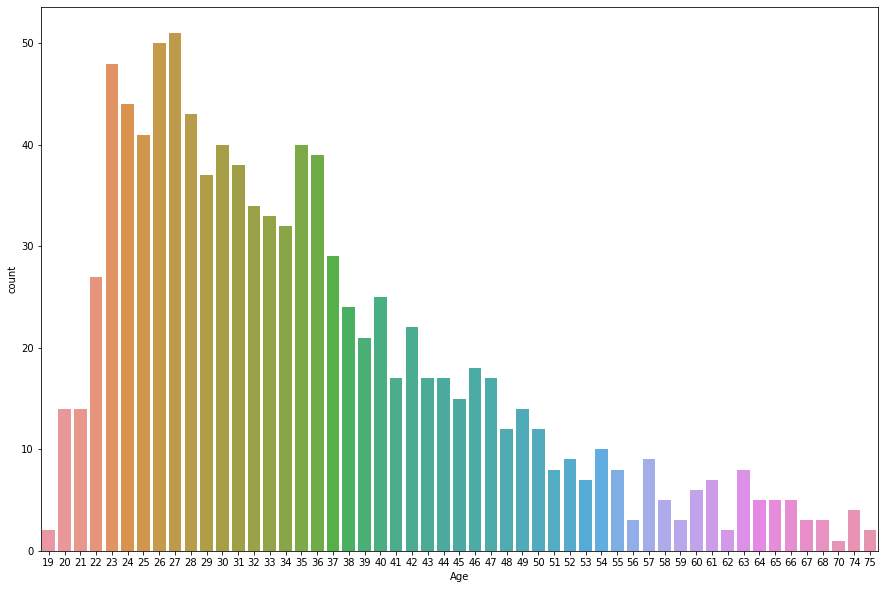

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(data['Age'])

Most of the people who took loan having Age between 20 to 50

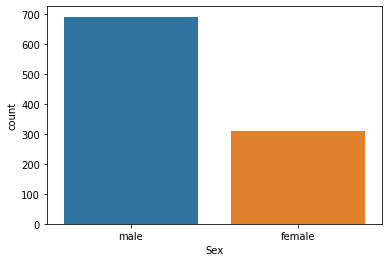

In [12]:
sns.countplot(data['Sex'])

Male Candidate are more  as compare to Female who take the credit

In [13]:
data['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

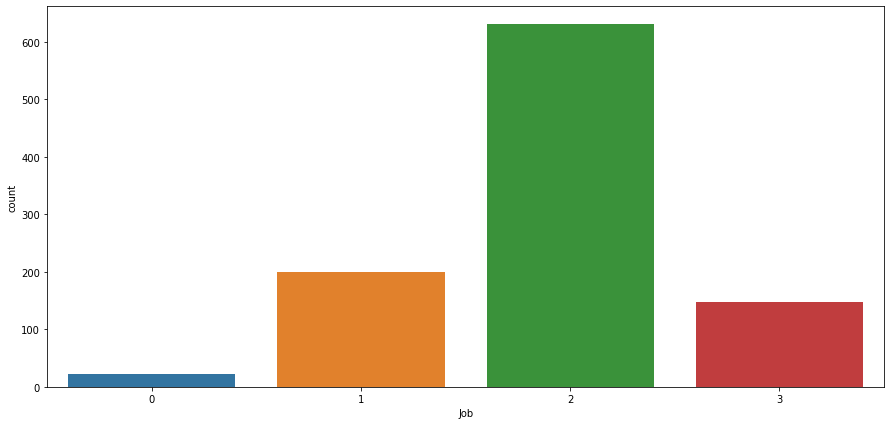

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(data['Job'])

The barplot above shows how many credits were granted for various Job categery. Most of credits were granted for 2 categery.

In [15]:
data['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [16]:
data['Credit amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

In [17]:

data['Duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

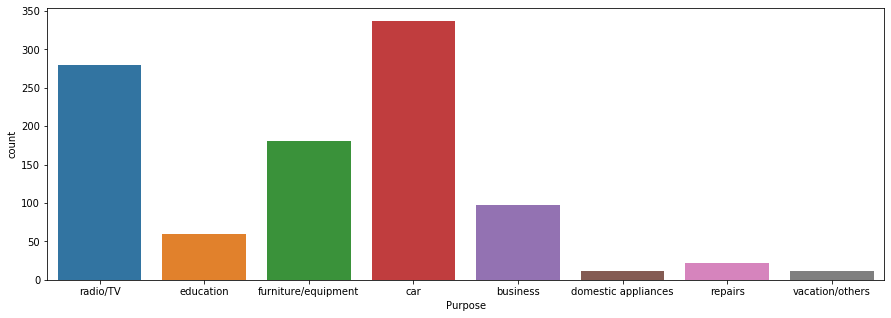

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data['Purpose'])

The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

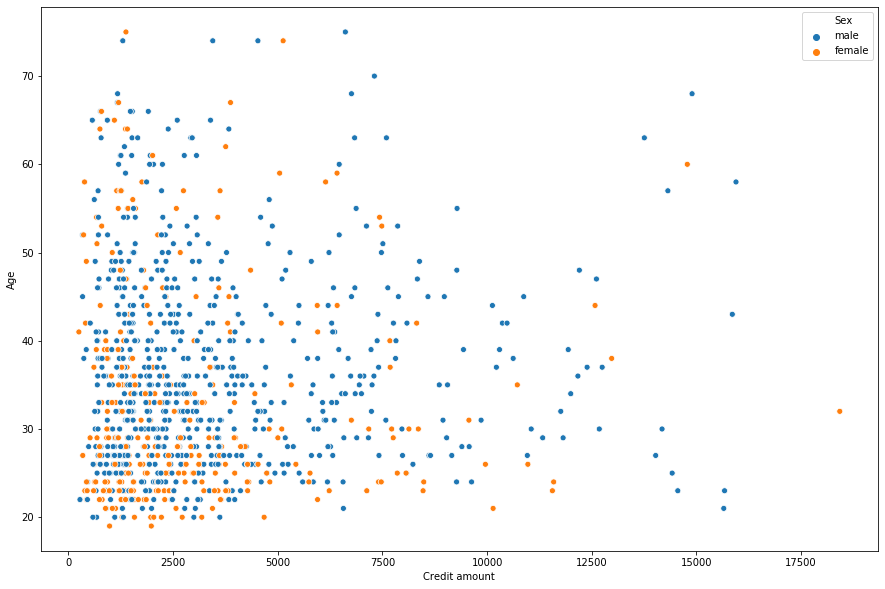

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(data['Credit amount'],data['Age'],hue=data['Sex'])

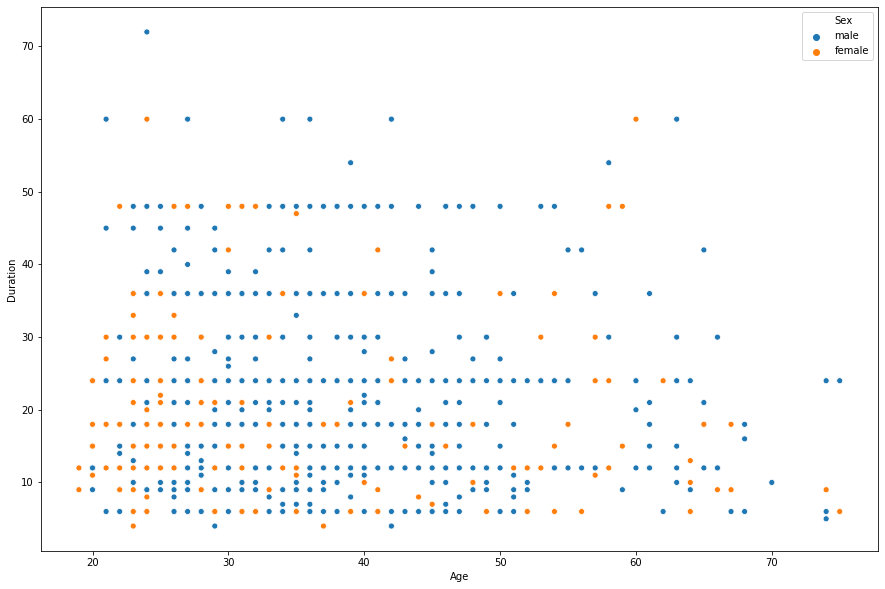

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(data['Age'],data['Duration'],hue=data['Sex'])

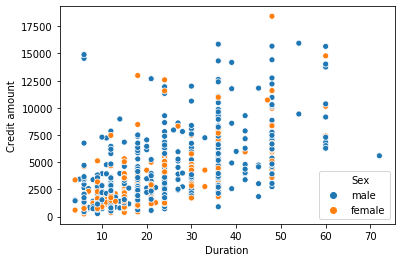

In [21]:
sns.scatterplot(data['Duration'],data['Credit amount'],hue=data['Sex'])

The general impression is that women tend to be younger than men.

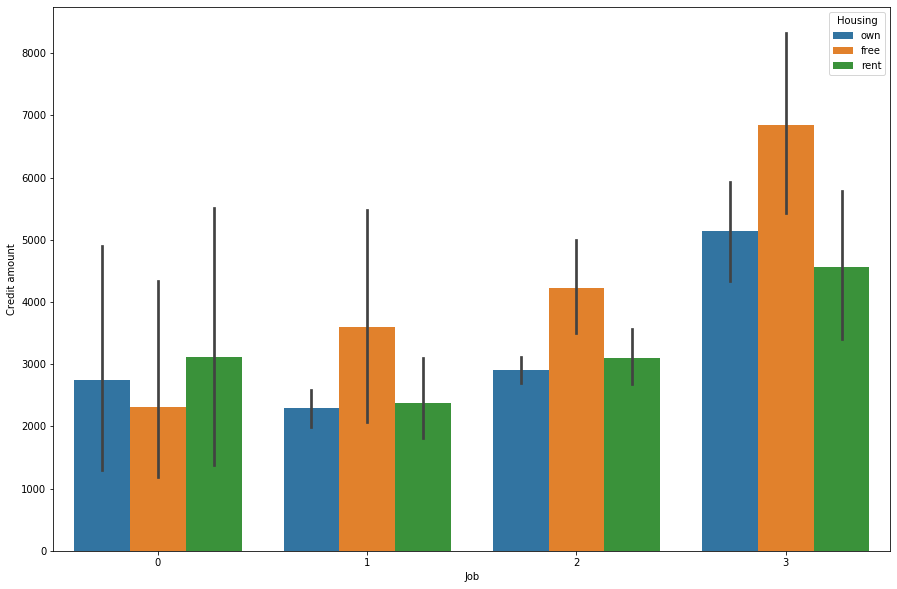

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data['Job'],data['Credit amount'],hue=data['Housing'])

The barplot above shows more credit pending to recover from job category 3 and also seen that people don't have any home are more in this cases

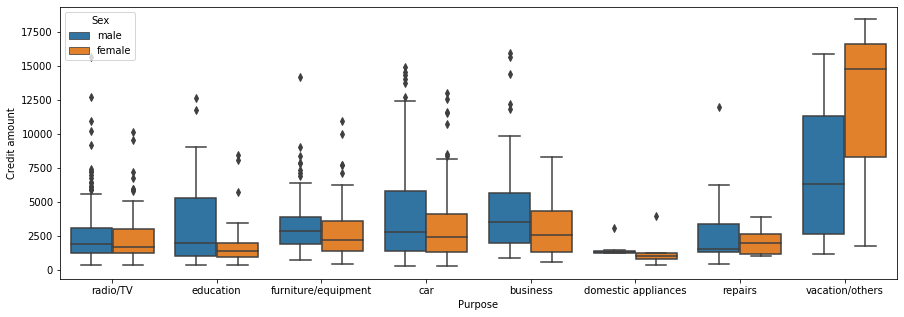

In [23]:
 plt.figure(figsize=(15,5))
sns.boxplot(x=data['Purpose'],y=data['Credit amount'], hue=data['Sex'])

The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). In most of the cases there is no difference between men and women, despite category vacation/others. But one must remember that there was very little number of credits granted in this category.

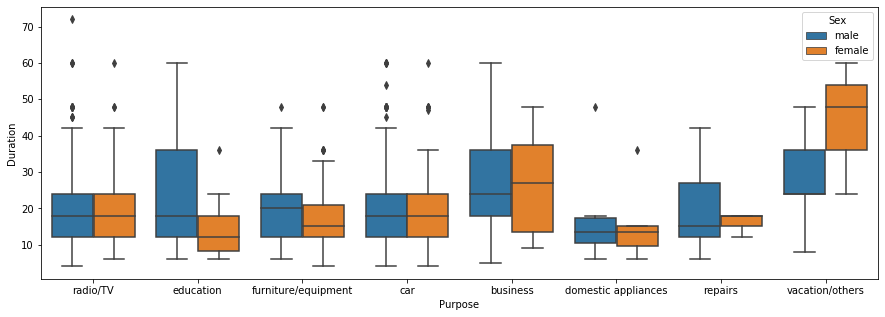

In [24]:
 plt.figure(figsize=(15,5))
sns.boxplot(x=data['Purpose'],y=data['Duration'], hue=data['Sex'])

The boxplot above indicates that generally there is no difference in credit duration between men and women. We can’t see also clear trend between categories with observations that the shortest duration is for domestic appliances. It makes sense as it is in agreement with insights from the previous graph (credit amount) – in this category, there are the lowest amounts of credits.

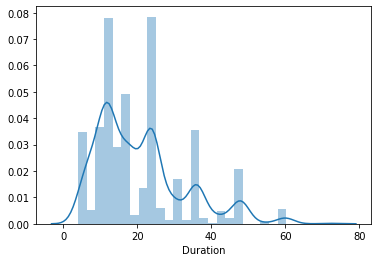

In [25]:
sns.distplot(data['Duration'])

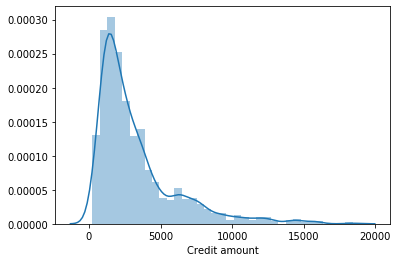

In [26]:
sns.distplot(data['Credit amount'])

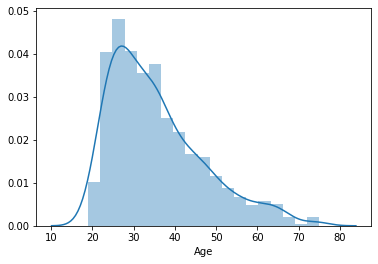

In [27]:
sns.distplot(data['Age'])

We can see that distributions are right-skewed. To obtain better results we should remove the skewness by logarithmic transformation. After that let's see how they look like.

In [28]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [29]:
col=['Age','Credit amount', 'Duration']
col = data.loc[:,col]

In [30]:
log_col=np.log(col)

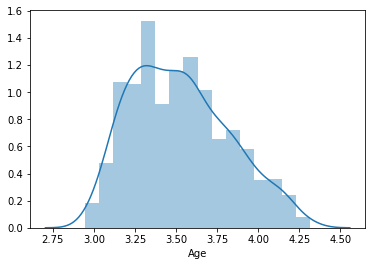

In [31]:
sns.distplot(log_col['Age'])

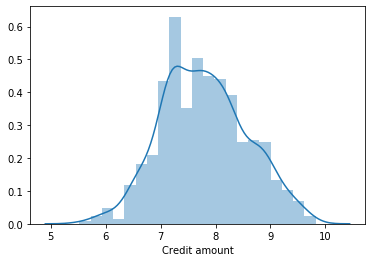

In [32]:
sns.distplot(log_col['Credit amount'])

Indeed, the skewness has been eliminated.

The next step will be centering and scaling of variables – it is required by KMeans algorithm. We will use for that a StandardScaler from sklearn library.

In [33]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
cl_scale=scale.fit_transform(log_col)

check how inertia changes for various number of clusters.

In [34]:
from sklearn.cluster import KMeans

In [35]:
iner=[]
for i in range(1,10):
    km=KMeans(n_clusters=i).fit(cl_scale)
    iner.append(km.inertia_)

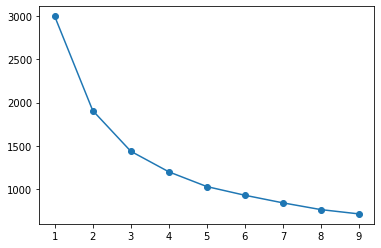

In [36]:
plt.plot(range(1,10),iner,marker='o')

The plot above shows that inertia decreases with increasing number of clusters.

In [37]:
kmeans_sel = KMeans(n_clusters=4, random_state=1).fit(cl_scale)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = col.assign(Cluster=labels)

In [42]:

def scatters(data, h=None, pal=None):
    plt.figure(figsize=(15,15))
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration",  hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

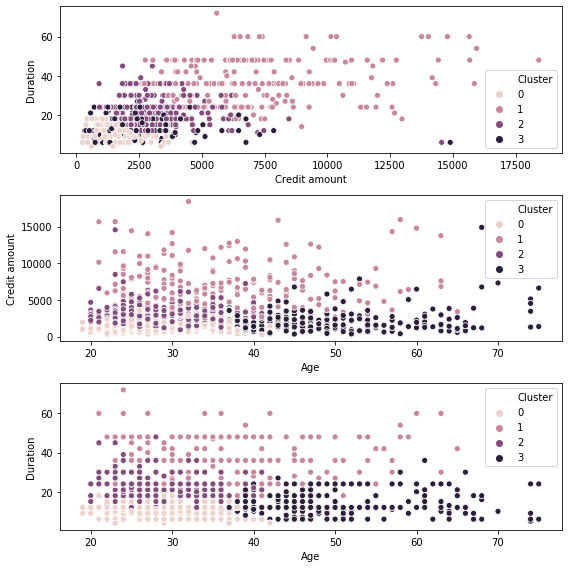

In [43]:

scatters(clustered_data, 'Cluster')



Cluster 0 – lower mean of credit amount, short duration, younger customers - Don't target these customers since they have low credit amount 

Cluster 1 – high mean of credit amount, long duration, middle-Age customers - Can target these set of customers by providing them with Low cost EMI's etc.

Cluster 2 - lower mean of credit amount, middle-time duration, young customers - provide them some offers or some gift 

cluster 3 -lower mean of credit amount,short duration,older customers - we mostly try to provide some discounts and try to cover up the credit amounts 
            